In [ ]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [ ]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip

!unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

--2025-03-25 12:27:16--  https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘book-crossings.zip.2’

book-crossings.zip. 100%[===================>]  24.88M   163MB/s    in 0.2s    

2025-03-25 12:27:17 (163 MB/s) - ‘book-crossings.zip.2’ saved [26085508/26085508]

Archive:  book-crossings.zip
replace BX-Book-Ratings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: BX-Book-Ratings.csv     
replace BX-Books.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


In [ ]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

In [ ]:
df_books.head()

,isbn,title,author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber


In [ ]:
df_ratings.head()

,user,isbn,rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


In [ ]:
# Check and drop missing values
print(df_books.isnull().sum())
print(df_ratings.isnull().sum())

df_books.dropna(inplace=True)
df_ratings.dropna(inplace=True)

isbn      0
title     0
author    2
dtype: int64
user      0
isbn      0
rating    0
dtype: int64


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 9) # (w, h)

<Axes: xlabel='user', ylabel='log_rating'>

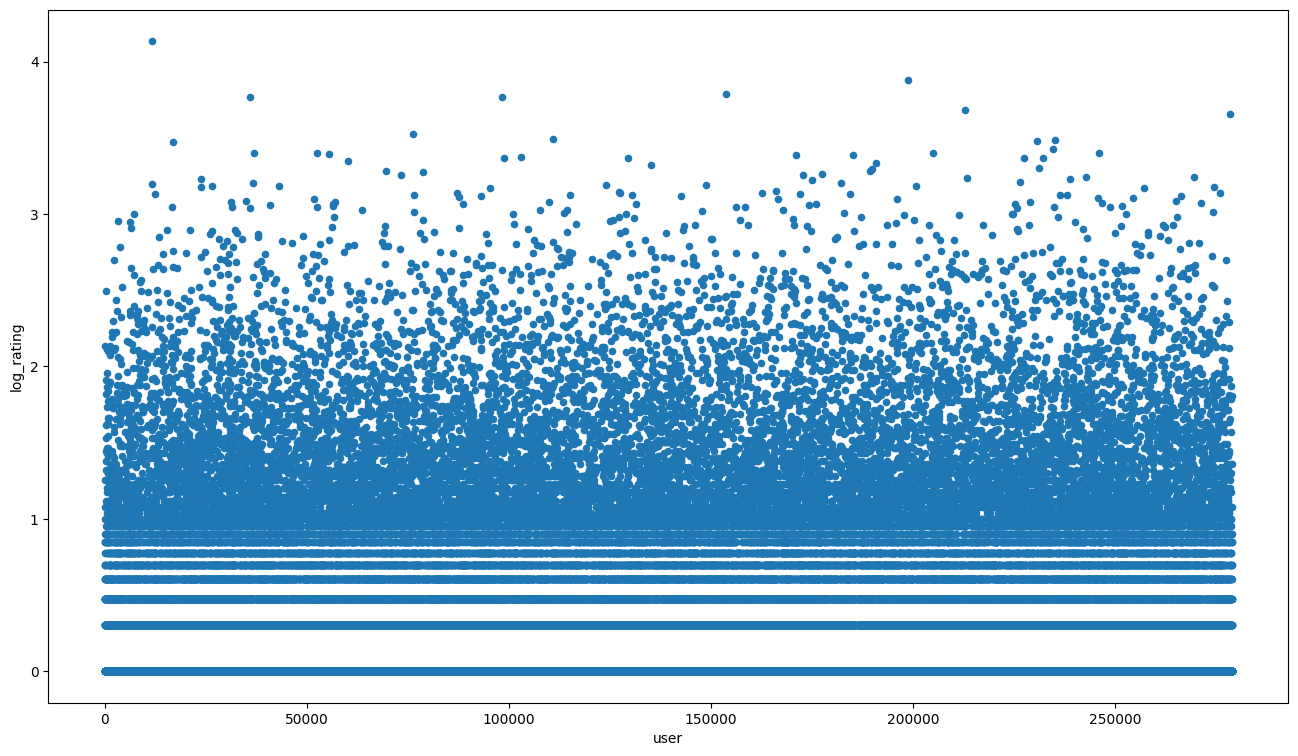

In [ ]:
# Count how many ratings each user gave
user_rating_counts = df_ratings[["user", "rating"]].groupby("user").count().reset_index()

user_rating_counts["log_rating"] = np.log10(user_rating_counts["rating"])
user_rating_counts.plot.scatter(x="user", y="log_rating")


In [ ]:
# Count how many times each book was rated
book_rating_counts = df_ratings.groupby(["isbn"]).count().reset_index()
popular_book_ids = book_rating_counts.loc[book_rating_counts["rating"] >= 100]["isbn"]


popular_books = df_books[df_books["isbn"].isin(popular_book_ids)]

user_rating_counts = df_ratings[["user", "rating"]]\
    .groupby("user")\
    .count()\
    .reset_index()

active_users = user_rating_counts[user_rating_counts["rating"] >= 200]["user"]

# Filter ratings to include only active users and popular books
df = df_ratings[df_ratings["user"].isin(active_users)]
df = df[df["isbn"].isin(popular_books["isbn"])]


In [ ]:
# Pivot ratings into a book-user matrix
book_user_matrix = df.pivot(
    index='isbn',
    columns='user',
    values='rating'
).fillna(0)


book_features_sparse = csr_matrix(book_user_matrix.values)

book_user_matrix.head()


user,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
isbn,,,,,,,,,,,,,,,,,,,,,
002542730X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
0060008032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060096195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
006016848X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060173289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
similarity_model = NearestNeighbors(metric='cosine')

In [ ]:
similarity_model.fit(book_features_sparse)

NearestNeighbors(metric='cosine')

In [ ]:
# Function to get book recommendations using KNN
def get_recommends(title=""):
    try:
        book = popular_books.loc[popular_books["title"] == title]
    except KeyError as e:
        print('Book', e, 'does not exist')
        return

    selected_vector = book_user_matrix.loc[book_user_matrix.index.isin(book["isbn"])]
    distances, indices = similarity_model.kneighbors([x for x in selected_vector.values], n_neighbors=6)

    distances = distances[0][1:]
    indices = indices[0][1:]

    recommended_titles = [
        df_books.loc[df_books['isbn'] == book_user_matrix.iloc[i].name]["title"].values[0]
        for i in indices
    ]

    recommended = [list(z) for z in zip(recommended_titles, distances)][::-1]
    return [title, recommended]


In [ ]:
books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books)

def test_book_recommendation():
  test_pass = True
  recommends = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
  if recommends[0] != "Where the Heart Is (Oprah's Book Club (Paperback))":
    test_pass = False
  recommended_books = ["I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True']
  recommended_books_dist = [0.8, 0.77, 0.77, 0.77]
  for i in range(2):
    if recommends[1][i][0] not in recommended_books:
      test_pass = False
    if abs(recommends[1][i][1] - recommended_books_dist[i]) >= 0.05:
      test_pass = False
  if test_pass:
    print("You passed the challenge! 🎉🎉🎉🎉🎉")
  else:
    print("You havn't passed yet. Keep trying!")

test_book_recommendation()

["Where the Heart Is (Oprah's Book Club (Paperback))", [["I'll Be Seeing You", np.float32(0.8016211)], ['The Weight of Water', np.float32(0.77085835)], ['The Surgeon', np.float32(0.7699411)], ['I Know This Much Is True', np.float32(0.7677075)], ['The Lovely Bones: A Novel', np.float32(0.7234864)]]]
You passed the challenge! 🎉🎉🎉🎉🎉
